### 1. Даны функции для сортировки массивов, которые работают за O(N^2): Пузырек и сортировка выбором, эмпирически определить, какая реализация быстрее и как зависит разница времени исполнения одного и другого от длины входного массива


Как решать:

    1) Генерируем случайный список чисел длины N и его точную копию

    2) Сортируем первый пузырьком, второй - выбором, в обоих случаях засекаем время

    3) Записываем время сортировки при длине N в списки.

    4) Получаем зависимость разницы времени исполнения от длины

    5) Готово, вы восхитительны.

Чтобы повысить точность, для каждого N можно сгенерировать случайный список несколько раз и усреднить время.

In [213]:
def bubble_sort(nums):

    # Устанавливаем swapped в True, чтобы цикл запустился хотя бы один раз
    swapped = True

    while swapped:
        swapped = False

        # Идем циклом по индексам наших элементов
        for i in range(len(nums) - 1):
        #print(nums)
            # Если текущий элемент слева больше своего элемента справа
            if nums[i] > nums[i + 1]:

                # Меняем элементы местами
                nums[i], nums[i + 1] = nums[i + 1], nums[i]

                # Устанавливаем swapped в True для следующей итерации
                swapped = True

                # По окончании первого прогона цикла for
                # самый большой элемент "Всплывет" наверх
                
                
def selection_sort(nums):

    # Значение i соответствует кол-ву отсортированных значений
    for i in range(len(nums)):

        # Исходно считаем наименьшим первый элемент
        lowest_value_index = i

        # Этот цикл перебирает несортированные элементы
        for j in range(i + 1, len(nums)):
            if nums[j] < nums[lowest_value_index]:
                lowest_value_index = j

        # Самый маленький элемент меняем с первым в списке
        nums[i], nums[lowest_value_index] = nums[lowest_value_index], nums[i]



[2.1899992134422064e-05, 0.0013644999999087304, 0.1689145999844186, 15.53452039998956]
[1.2399978004395962e-05, 0.0006253999890759587, 0.03151210001669824, 4.42925099999411]


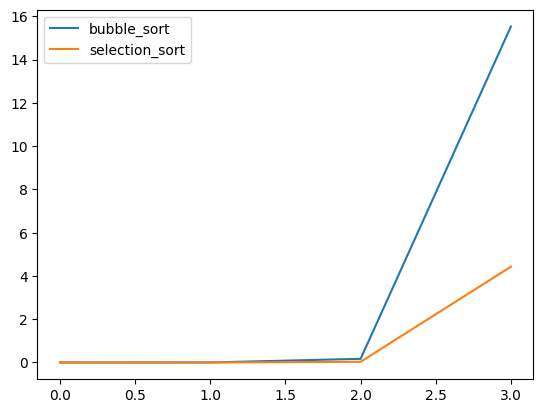

In [228]:
from random import randint
import time

arr1_time, arr2_time = [], []
for n in (10, 100, 1000, 10000):
    arr1 = [randint(1, 1000) for _ in range(n)]
    arr2 = arr1.copy()

    start = time.perf_counter()
    bubble_sort(arr1)
    arr1_time.append(time.perf_counter() - start)

    start = time.perf_counter()
    selection_sort(arr2)
    arr2_time.append(time.perf_counter() - start)


print(arr1_time)
print(arr2_time)
plt.plot(arr1_time, label = 'bubble_sort')
plt.plot(arr2_time, label = 'selection_sort')
plt.legend()

### 2. [Алгоритм имитации отжига](https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/)

Прочтите статью про алгоритм имитации отжига (я сдернул информацию по ссылке), это простейший не-градиентный алгоритм оптимизации функций(поиска экстремума)


**Задание 1**

Проверьте, как зависит скорость сходимости алгоритма для целевой функии вида $y = x^2$ от:

1) начальной температуры

2) размера шага алгоритма (попробуйте подомножать результаты randn на число и заменить нормальное распределение на равномерное)


**Задание 2**

Попробовать желательно, но не обязательно.

Модифицируйте алгоритм так чтобы он работал для квадратичной функции от двух переменных $x^2 + y^2$ и , если возможно, от n переменных.

In [215]:
# simulated annealing search of a one-dimensional objective function
import time
import matplotlib.pyplot as plt
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed

# objective function
def objective(x):
        return sum(list(map(lambda a: a **2, x)))

# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
        # generate an initial point
        best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
        # evaluate the initial point
        best_eval = objective(best)
        # current working solution
        curr, curr_eval = best, best_eval
        # run the algorithm
        for i in range(n_iterations):
            # take a step
            candidate = curr + randn(len(bounds)) * step_size
            # evaluate candidate point
            candidate_eval = objective(candidate)
            # check for new best solution
            if candidate_eval < best_eval:
                # store new best point
                best, best_eval = candidate, candidate_eval
                # report progress
                print('>%d f(%s) = %.5f' % (i, best, best_eval))
            # difference between candidate and current point evaluation
            diff = candidate_eval - curr_eval
            # calculate temperature for current epoch
            t = temp / float(i + 1)
            # calculate metropolis acceptance criterion
            metropolis = exp(-diff / t)
            # check if we should keep the new point
            if diff < 0 or rand() < metropolis:
                # store the new current point
                curr, curr_eval = candidate, candidate_eval
        return [best, best_eval]


In [216]:
# Оценить скорость сходимости по времени от температуры
res_temp = []
for temp in (10, 100, 1000, 10000, 100000):
        # seed the pseudorandom number generator
        seed(1)
        # define range for input
        bounds = asarray([[-5.0, 5.0]])
        # define the total iterations
        n_iterations = 1000
        # define the maximum step size
        step_size = 0.1
        # initial temperature
        # temp = 200
        # perform the simulated annealing search
        start = time.perf_counter()
        best, score = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
        res_temp.append(time.perf_counter() - start)
        print('Done!')
        print('f(%s) = %f' % (best, score))



>34 f([-0.78753544]) = 0.62021
>35 f([-0.76914239]) = 0.59158
>37 f([-0.68574854]) = 0.47025
>39 f([-0.64797564]) = 0.41987
>40 f([-0.58914623]) = 0.34709
>41 f([-0.55446029]) = 0.30743
>42 f([-0.41775702]) = 0.17452
>43 f([-0.35038542]) = 0.12277
>50 f([-0.15799045]) = 0.02496
>66 f([-0.11089772]) = 0.01230
>67 f([-0.09238208]) = 0.00853
>72 f([-0.09145261]) = 0.00836
>75 f([-0.05129162]) = 0.00263
>93 f([-0.02854417]) = 0.00081
>144 f([0.00864136]) = 0.00007
>149 f([0.00753953]) = 0.00006
>167 f([-0.00640394]) = 0.00004
>225 f([-0.00044965]) = 0.00000
>503 f([-0.00036261]) = 0.00000
>512 f([0.00013605]) = 0.00000
Done!
f([0.00013605]) = 0.000000
>43 f([-0.81546325]) = 0.66498
>50 f([-0.75222455]) = 0.56584
>66 f([-0.70513183]) = 0.49721
>67 f([-0.68661619]) = 0.47144
>72 f([-0.68568671]) = 0.47017
>75 f([-0.64552573]) = 0.41670
>95 f([-0.60847461]) = 0.37024
>98 f([-0.57265577]) = 0.32793
>100 f([-0.57060452]) = 0.32559
>103 f([-0.37263784]) = 0.13886
>105 f([-0.35974449]) = 0.12942


In [217]:
res_temp

[0.03202800001599826,
 0.018673100013984367,
 0.013023799983784556,
 0.014059099979931489,
 0.01869929998065345]

In [225]:
res_iterations = []

step_sizes = (0.02, 0.05, 0.1, 0.5, 1.0)
for step_size in step_sizes:
        # seed the pseudorandom number generator
        seed(1)
        # define range for input
        bounds = asarray([[-5.0, 5.0]])
        # define the total iterations
        n_iterations = 1000
        # define the maximum step size
#         step_size = 0.1
        # initial temperature
        temp = 200
        # perform the simulated annealing search
        start = time.perf_counter()
        best, score = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
        res_iterations.append(time.perf_counter() - start)
        print('Done!')
        print('f(%s) = %f' % (best, score))

>43 f([-0.82691661]) = 0.68379
>103 f([-0.8091797]) = 0.65477
>105 f([-0.80660103]) = 0.65061
>106 f([-0.78922331]) = 0.62287
>107 f([-0.77421507]) = 0.59941
>108 f([-0.76362577]) = 0.58312
>109 f([-0.76087174]) = 0.57893
>110 f([-0.75931532]) = 0.57656
>111 f([-0.74694771]) = 0.55793
>112 f([-0.74229782]) = 0.55101
>113 f([-0.7286468]) = 0.53093
>145 f([-0.72027838]) = 0.51880
>146 f([-0.70405935]) = 0.49570
>147 f([-0.68317051]) = 0.46672
>149 f([-0.67470796]) = 0.45523
>165 f([-0.65346676]) = 0.42702
>196 f([-0.63680942]) = 0.40553
>197 f([-0.62755798]) = 0.39383
>202 f([-0.60318339]) = 0.36383
>231 f([-0.58722487]) = 0.34483
>238 f([-0.57497302]) = 0.33059
>240 f([-0.57489451]) = 0.33050
>241 f([-0.55244794]) = 0.30520
>244 f([-0.54549563]) = 0.29757
>274 f([-0.52966858]) = 0.28055
>303 f([-0.52566078]) = 0.27632
>307 f([-0.50236755]) = 0.25237
>309 f([-0.48005073]) = 0.23045
>316 f([-0.47505778]) = 0.22568
>317 f([-0.47336184]) = 0.22407
>319 f([-0.44597586]) = 0.19889
>320 f([-0.

In [226]:
res_iterations

[0.03460630000336096,
 0.029157499986467883,
 0.016336800006683916,
 0.01179940000292845,
 0.009072799992281944]

Text(0.5, 0, 'Скорость работы')

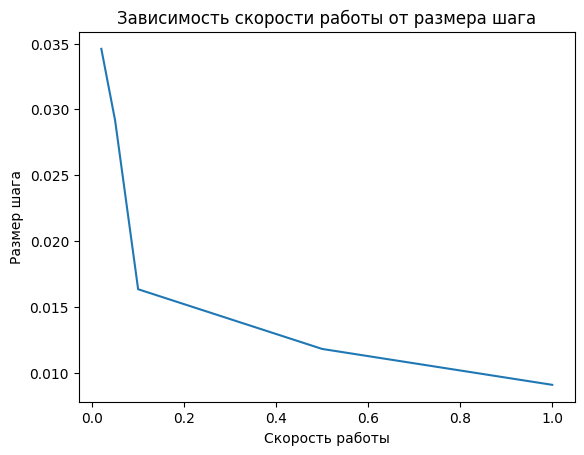

In [227]:
plt.plot(step_sizes, res_iterations)
plt.title('Зависимость скорости работы от размера шага')
plt.ylabel('Размер шага')
plt.xlabel('Скорость работы')

### 3. Подсчет слов
Давайте теперь поработаем с настоящим файлом и действительно посчитаем в нем слова. Мы загрузим метаданные почтового сервера университета Мичигана. И попробуем **найти, с какого адреса ушло больше всего писем.**

In [3]:
# импортируем библиотеку для доступа к файлам в интернете
import requests
# в переменной mbox хранится текст для работы
mbox = requests.get('http://www.py4inf.com/code/mbox.txt').text

In [21]:
mbox = mbox[5:]

In [22]:
messeges = mbox.split('\n\n\nFrom')

In [27]:
from collections import defaultdict
counter = defaultdict(int)

for messege in messeges:
    counter[messege.split()[0]] += 1

In [28]:
counter

defaultdict(int,
            {'stephen.marquard@uct.ac.za': 29,
             'louis@media.berkeley.edu': 24,
             'zqian@umich.edu': 195,
             'rjlowe@iupui.edu': 90,
             'cwen@iupui.edu': 158,
             'gsilver@umich.edu': 28,
             'wagnermr@iupui.edu': 44,
             'antranig@caret.cam.ac.uk': 18,
             'gopal.ramasammycook@gmail.com': 25,
             'david.horwitz@uct.ac.za': 67,
             'ray@media.berkeley.edu': 32,
             'mmmay@indiana.edu': 161,
             'stuart.freeman@et.gatech.edu': 17,
             'tnguyen@iupui.edu': 6,
             'chmaurer@iupui.edu': 111,
             'aaronz@vt.edu': 110,
             'ian@caret.cam.ac.uk': 96,
             'csev@umich.edu': 19,
             'jimeng@umich.edu': 93,
             'josrodri@iupui.edu': 28,
             'knoop@umich.edu': 5,
             'bkirschn@umich.edu': 27,
             'dlhaines@umich.edu': 84,
             'hu2@iupui.edu': 7,
             'sgithens@ca

In [29]:
max(counter, key=counter.get), counter[max(counter, key=counter.get)]

('zqian@umich.edu', 195)

### 4. Напишите функцию, которая переводит число, записанное римскими цифрами, в десятичное

Символы для римских цифр:

    I             1
    V             5
    X             10
    L             50
    C             100
    D             500
    M             1000


Например, 2 записывается как II .

12 записывается как XII, что просто X + II.

Число 27 записывается как XXVII, что равно XX + V + II.

Римские цифры обычно записываются от большего к меньшему слева направо. Однако символы для 4 не IIII. Вместо этого число четыре записывается как IV, потому что если I стоит перед V, мы "вычитаем его", получая тем самым четыре. Тот же принцип работает и для числа девять, которое записывается как IX. Существует шесть случаев, когда используется вычитание:

    I может быть помещен перед V (5) и X (10) для получения 4 и 9.
    X может быть помещен перед L (50) и C (100) для получения 40 и 90.
    C может быть помещен перед D (500) и M (1000), чтобы получить 400 и 900.

In [44]:
roman = 'XII'
trans = {'I': 1, 'V': 5, 'X': 10, 'L': 50, 'C': 100, 'D': 500, 'M': 1000}
arabic = [trans[r] for r in roman]

In [46]:
trans = {'I': 1, 'V': 5, 'X': 10, 'L': 50, 'C': 100, 'D': 500, 'M': 1000}
def rom_to_arabic(roman):
    arabic = [trans[r] for r in roman]
    result = 0
    for i in range(0, len(arabic) - 1):
        if arabic[i] < arabic[i+1]:
            result -= arabic[i]
        else:
            result += arabic[i]
    result += arabic[-1]
    return result

In [48]:
# Проверка

assert rom_to_arabic('XII') == 12
assert rom_to_arabic('XXVII') == 27
assert rom_to_arabic('IV') == 4
assert rom_to_arabic('IX') == 9

### 5. Напишите декоратор, который сначала выводит на печать имя вызываемой функции, затем делает паузу в 3 секунды, а затем вызывает функцию

(Про имя вызываемой функции можно глянуть в лекции - там один из декораторов такое делал)

In [65]:
import functools
import time

def wrapper(func):
    @functools.wraps(func)
    def wraps(*args, **kwargs):
        print('func name is', func.__name__)
        time.sleep(3)
        return func(*args, **kwargs)
    return wraps

In [66]:
# Проверка
@wrapper
def greeting(name):
    print(f'hello {name}')
    
greeting('asdsda')

func name is greeting
hello asdsda


### 6. Функции ошибок

В целом, машинное обучение часто сводится к минимизации какого-то функционала ошибки. Ваш алгоритм на обучающей выборке возвращает список предсказаний, который вы с помощью какого-то функционала сравниваете с правильными ответами и получаете некое значение (ошибку), которую нужно минимизировать. В этом задании необходимо реализовать ряд функционалов ошибок.


## Пример - MSE

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

In [77]:
from typing import List
import numpy as np

def mse(prediction:List[float], 
        actual_values:List[float]) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем среднеквадратичную ошибку
    '''
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    mse = sum((prediction[i] - actual_values[i])**2 for i in range(N))/N
    
    return mse

In [102]:
a = [1,2,3,4,5]
b = [1,2,3,10,6]

assert mse(a,b) == mean_squared_error(a,b)

Аналогичным образом реализуйте следующий список функций ошибок:

    RMSE, LogLoss, HueberLoss, MAE, MAPE, sMAPE, log-cosh loss, quantile loss  :) 

Вопросы можно задавать

In [103]:
def mae(prediction:List[float], 
        actual_values:List[float]) -> float:
    
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    mae = np.mean(np.abs(np.array(actual_values) - np.array(prediction)))
    
    return mae

In [104]:
assert mae(a,b) == mean_absolute_error(a,b)

In [105]:
def mape(prediction:List[float], 
        actual_values:List[float]) -> float:
    
    assert len(prediction) == len(actual_values)
    
    mape = np.mean(np.abs((np.array(actual_values) - np.array(prediction)) / np.array(actual_values)))
    
    return mape

In [106]:
assert mape(a,b) == mean_absolute_percentage_error(b,a)

In [172]:
def smape(prediction:List[float], 
        actual_values:List[float]) -> float:
    
    assert len(prediction) == len(actual_values)
    
    prediction = np.array(prediction)
    actual_values = np.array(actual_values)
    
    smape = np.mean(2*np.abs(actual_values - prediction) / (np.abs(actual_values) + np.abs(prediction)))
    
    return smape

In [109]:
def rmse(prediction:List[float], 
        actual_values:List[float]) -> float:
    assert len(prediction) == len(actual_values)
    
    rmse = np.mean((np.array(actual_values) - np.array(prediction))**2)**(1/2)
    
    return rmse

In [110]:
assert rmse(a,b) == mean_squared_error(a,b, squared=False)

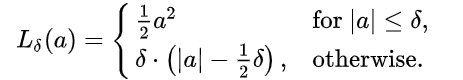

In [195]:
def HueberLoss(prediction:List[float], 
        actual_values:List[float],
              thr:float=0.1) -> float:
    
    assert len(prediction) == len(actual_values)
    
    prediction = np.array(prediction)
    actual_values = np.array(actual_values)
    
    linear_loss = np.abs(actual_values - prediction)
    non_linear_loss = (actual_values - prediction)**2
    
    outliers = linear_loss > thr
    
    hueber_loss = np.mean(thr*(linear_loss - (1/2)*thr)*outliers + (1/2)*non_linear_loss*(1-outliers))

    return hueber_loss

In [196]:
assert 2*HueberLoss(a,b, 10) == mse(a,b)

In [197]:
def log_cosh(prediction:List[float], 
        actual_values:List[float]) -> float:
    
    assert len(prediction) == len(actual_values)
    
    prediction = np.array(prediction)
    actual_values = np.array(actual_values)
    
    log_cosh = np.mean(np.log(np.cosh(actual_values - prediction)))

    return log_cosh

In [198]:
log_cosh(a,b)

0.10976514202752093

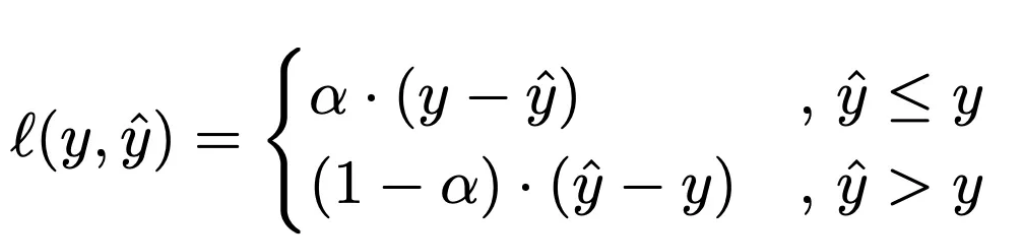

In [211]:
def quantile_loss(prediction:List[float], 
        actual_values:List[float],
              q:float=0.9) -> float:
    
    assert len(prediction) == len(actual_values)
    
    prediction = np.array(prediction)
    actual_values = np.array(actual_values)
    
    quantile_loss = np.mean(np.maximum(q*(actual_values - prediction),
                                       (1-q)*(prediction-actual_values)))

    return quantile_loss

In [212]:
quantile_loss(a,b, 0.6)

0.20400000000000001

#### classification loss

In [156]:
a = [1,0,0,1,0]
b = [0.2,0.4,0.6,0.9,0.1]

In [159]:
def logloss(prediction:List[float], 
        actual_values:List[float]) -> float:
    assert len(prediction) == len(actual_values)
    
    logloss = -np.mean((np.log(np.array(prediction)) * np.array(actual_values)) 
                       + (np.log(1-np.array(prediction)) * (1 - np.array(actual_values))))
    
    return logloss

In [160]:
assert log_loss(a,b) == logloss(b,a)